A basic practice of TIme Series Forecasting using Air Passengers data set. 
Source of data set: https://www.kaggle.com/rakannimer/air-passengers

In [2]:
#importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
#reading the dataset
data = pd.read_csv("AirPassengers.csv")
print(data.tail())
print(data.dtypes)

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432
Month          object
#Passengers     int64
dtype: object


In [9]:
#converting data as index
from datetime import datetime
con = data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [15]:
#checking data between some intervals
ts['1949-05-01':'1950-01-01']

Month
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
Name: #Passengers, dtype: int64

In [19]:
ts.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

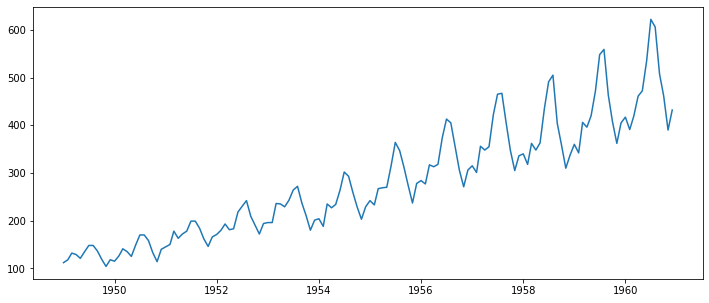

In [25]:
plt.figure(figsize=(12,5))
plt.plot(ts)

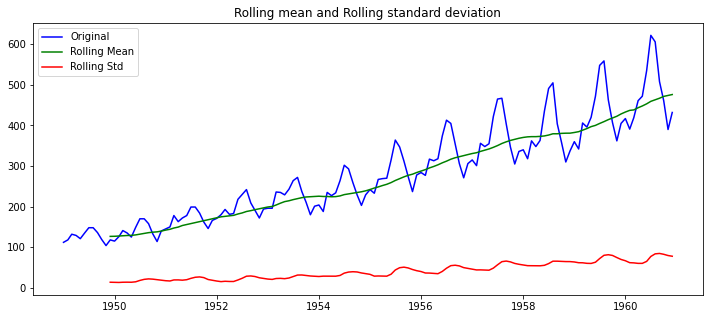

Dickey-Fuller Test Results:
Test Statistic               0.815369
p-value                      0.991880
Lags Used                   13.000000
no.of observations used    130.000000
Critical value(1%)          -3.481682
Critical value(5%)          -2.884042
Critical value(10%)         -2.578770
dtype: float64


In [75]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    plt.figure(figsize=(12,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='green', label='Rolling Mean')
    plt.plot(rolstd, color='red', label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling mean and Rolling standard deviation")
    plt.show()
    print("Dickey-Fuller Test Results:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 
                                            'p-value', 'Lags Used', 
                                            'no.of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value(%s)'%key]=value
    print(dfoutput)
test_stationary(ts)

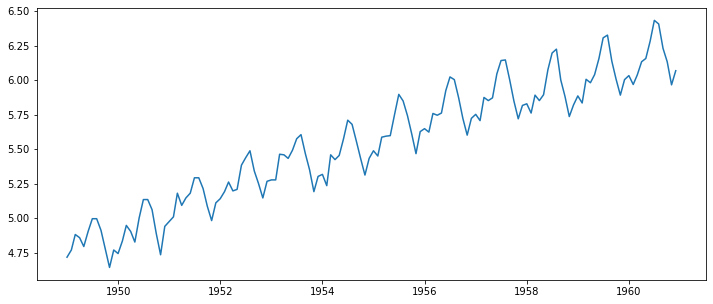

In [95]:
#reducing the trend using logarithimic transformation
ts_log = np.log(ts)
plt.figure(figsize=(12,5))
plt.plot(ts_log)

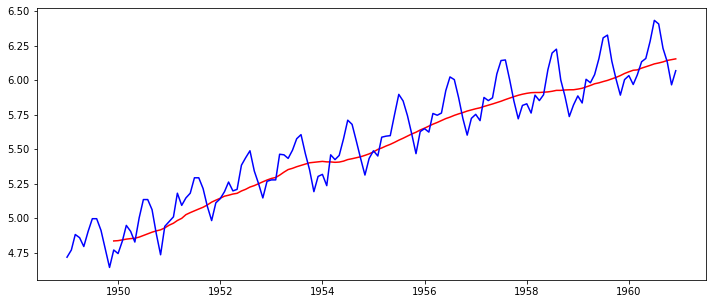

In [54]:
#comparision between logarithimic transformation and moving avg of it
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(12,5))
plt.plot(moving_avg, color='red')
plt.plot(ts_log, color='blue')

In [53]:
#diff between logarithimic transformation and its moving avg
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

In [59]:
#dropping null values from above
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

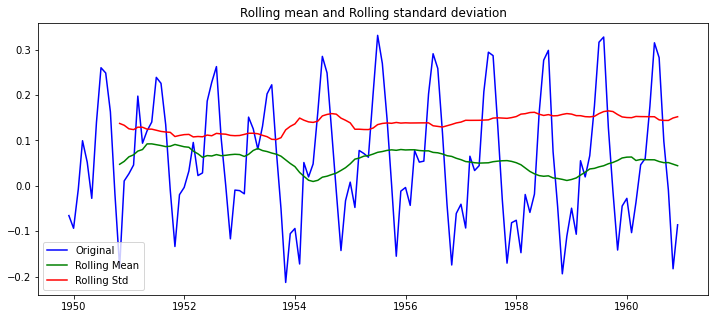

Dickey-Fuller Test Results:
Test Statistic              -3.162908
p-value                      0.022235
Lags Used                   13.000000
no.of observations used    119.000000
Critical value(1%)          -3.486535
Critical value(5%)          -2.886151
Critical value(10%)         -2.579896
dtype: float64


In [76]:
test_stationary(ts_log_moving_avg_diff)

slight variations between rolling mean and standard deviations but no specific trend observed.
And Test Statistic is less then 5% critical value i.e 95% confidence

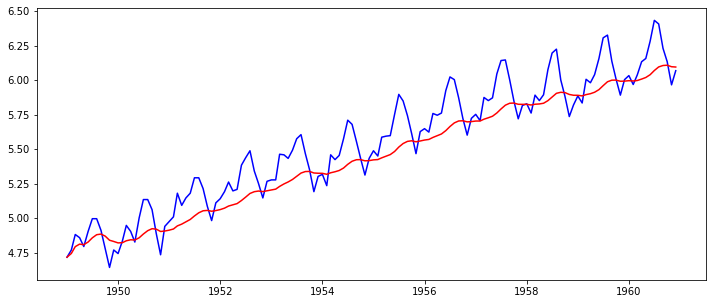

In [70]:
#exponentially weighted moving average 
ewma = ts_log.ewm(12).mean()
plt.figure(figsize=(12,5))
plt.plot(ts_log, color='blue')
plt.plot(ewma, color='red')

In [72]:
ts_log_ewma_diff = ts_log - ewma
ts_log_ewma_diff.head()

Month
1949-01-01    0.000000
1949-02-01    0.025049
1949-03-01    0.087740
1949-04-01    0.046571
1949-05-01   -0.013381
Name: #Passengers, dtype: float64

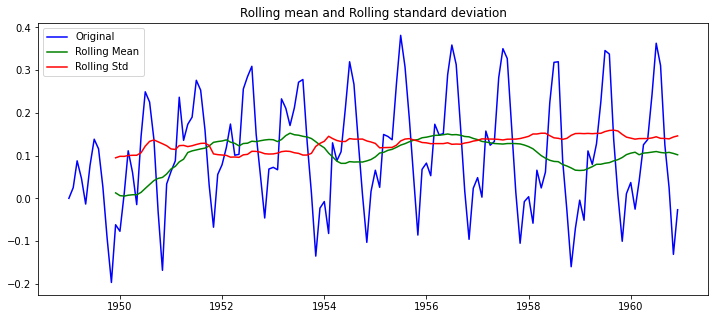

Dickey-Fuller Test Results:
Test Statistic              -3.566092
p-value                      0.006443
Lags Used                   13.000000
no.of observations used    130.000000
Critical value(1%)          -3.481682
Critical value(5%)          -2.884042
Critical value(10%)         -2.578770
dtype: float64


In [78]:
test_stationary(ts_log_ewma_diff)

less variations between rolling mean and standard deviations.
And Test Statistic is less then 1% critical value i.e 99% confidence

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01    0.052186
Name: #Passengers, dtype: float64


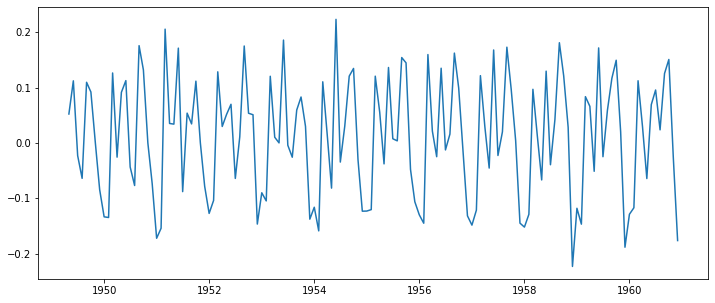

In [84]:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(12,5))
plt.plot(ts_log_diff)
print(ts_log_diff.head())

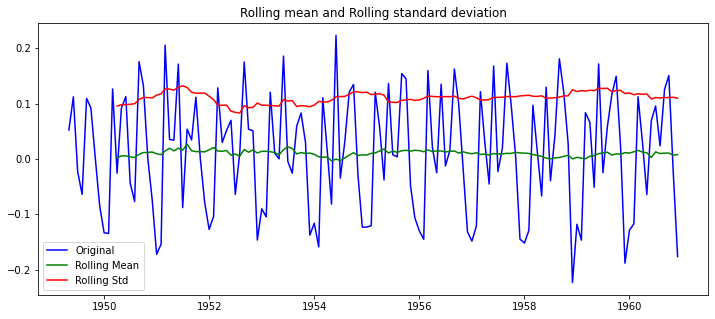

Dickey-Fuller Test Results:
Test Statistic              -2.706950
p-value                      0.072843
Lags Used                   14.000000
no.of observations used    125.000000
Critical value(1%)          -3.483779
Critical value(5%)          -2.884954
Critical value(10%)         -2.579257
dtype: float64


In [85]:
ts_log_diff.dropna(inplace=True)
test_stationary(ts_log_diff)

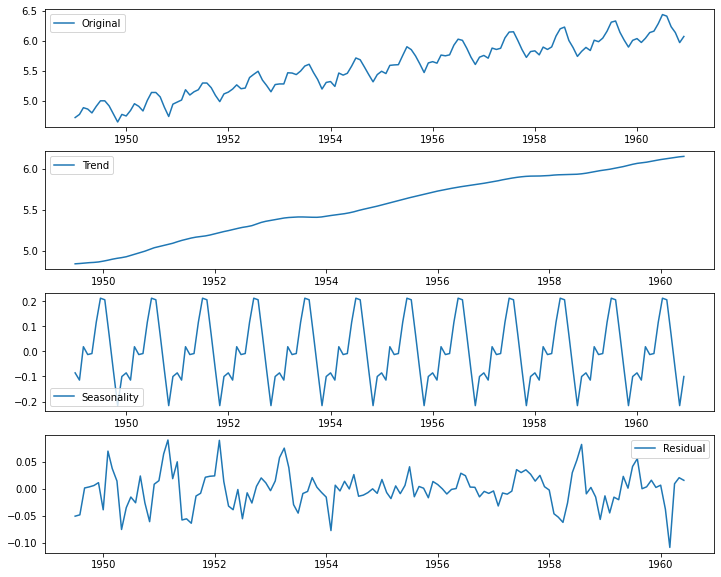

In [108]:
#decomposing

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend=decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

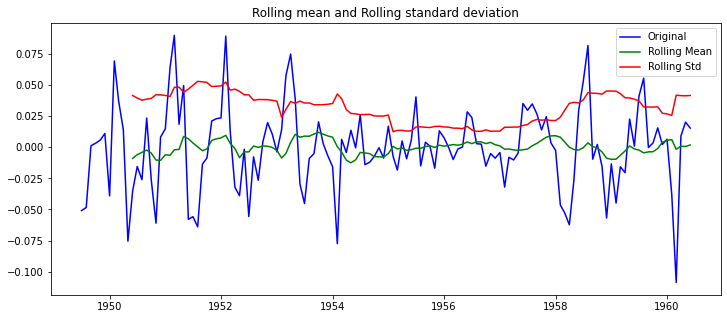

Dickey-Fuller Test Results:
Test Statistic            -6.332387e+00
p-value                    2.885059e-08
Lags Used                  9.000000e+00
no.of observations used    1.220000e+02
Critical value(1%)        -3.485122e+00
Critical value(5%)        -2.885538e+00
Critical value(10%)       -2.579569e+00
dtype: float64


In [109]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationary(ts_log_decompose)

Test Statistic is less then 1% critical value i.e 99% confidence
And small variations between mean and std with time

# Forecasting using ARIMA

C:\Users\Vishal Gardas\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


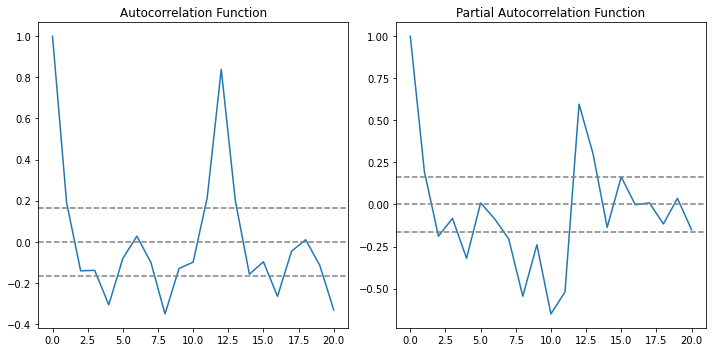

In [119]:
from statsmodels.tsa.arima_model import ARIMA
#Autocorrelation function, Partial Autocorrelation function
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

C:\Users\Vishal Gardas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishal Gardas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

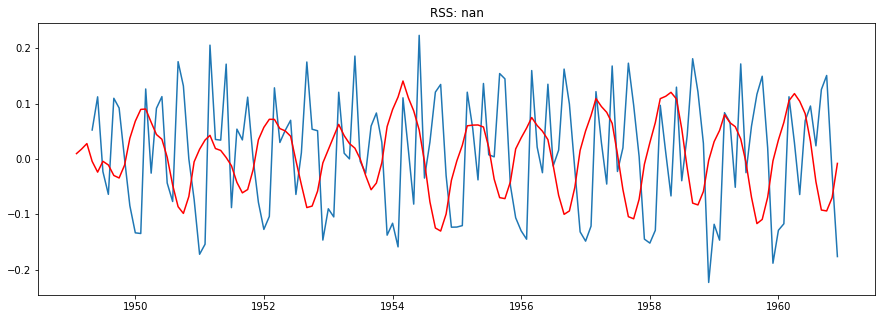

In [169]:
model = ARIMA(ts_log, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(15,5))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %0.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))

C:\Users\Vishal Gardas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishal Gardas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

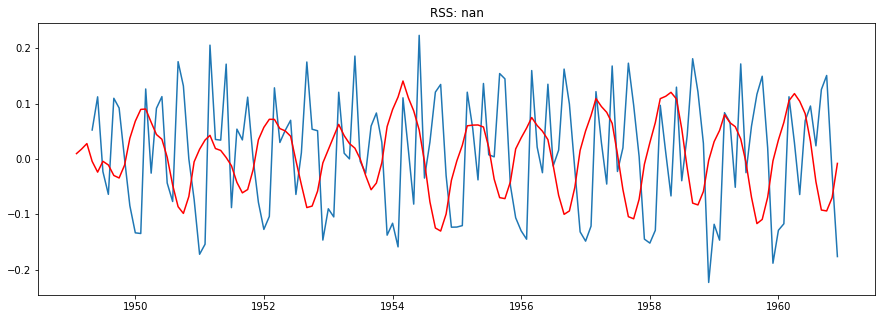

In [170]:
model = ARIMA(ts_log, order=(2,1,2))
results_MA = model.fit(disp=-1)
plt.figure(figsize=(15,5))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %0.4f'% sum((results_MA.fittedvalues - ts_log_diff)**2))

C:\Users\Vishal Gardas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vishal Gardas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

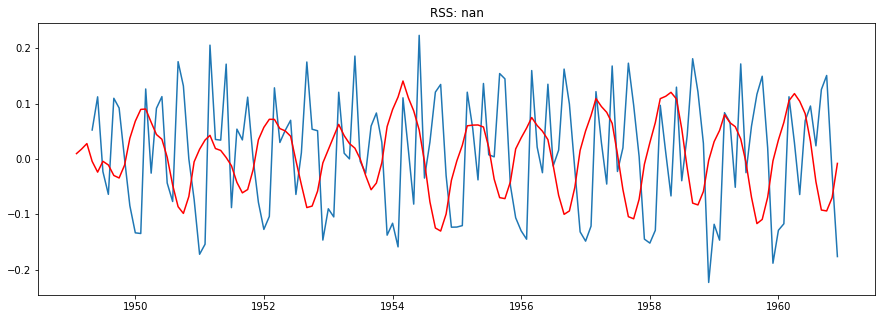

In [166]:
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(15,5))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %0.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))

In [171]:
#predictions using ARIMA
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [173]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [176]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

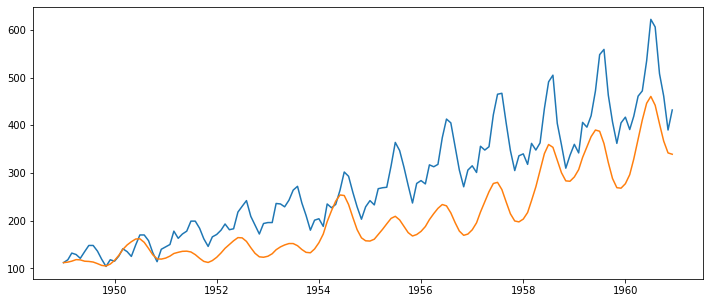

In [180]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(12,5))
plt.plot(ts)
plt.plot(predictions_ARIMA)